# Declaration of Originality

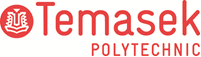

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jayden Chew (2401697D)
* Tutorial Group                : PC07
* Tutor						    : Ester Goh
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Business Understanding
Goal: The goal of this is to build a model to predict the selling price of used cars using features such as year, kilometers driven, fuel type, seller type, transmission, owner history, mileage, engine capacity, max power, torque and number of seats. This helps people who want to buy cars make informed decisions on buying cars.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'Car details v3.csv'
df = pd.read_csv(FILE_PATH)  
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## 2.2 Summary Statistics

## Understand the type of variable for each column

- name - categorical (text)
- year - numerical (integer)
- selling_price - numerical (float)
- km_driven - numerical (integer)
- fuel - categorical 
- seller_type - categorical 
- transmission - categorical
- owner - categorical
- mileage - numerical (float)
- engine - numerical (integer)
- max_power - numerical (float)
- torque - numerical (float)
- seats - numerical (float)



In [3]:
## Check for missing data

df.isnull().sum()



name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df = df.drop(['torque'], axis=1)

df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [5]:


df['mileage'] = df['mileage'].astype(str).str.extract(r'([\d.]+)')
df['engine'] = df['engine'].astype(str).str.extract(r'([\d.]+)')
df['max_power'] = df['max_power'].astype(str).str.extract(r'([\d.]+)')

In [6]:


df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


In [7]:


df['mileage'] = df['mileage'].fillna(0)
df['engine'] = df['engine'].fillna(0)
df['max_power'].fillna(df['max_power'].mean(), inplace=True)
df['seats'].fillna(df['seats'].mean(), inplace=True)


C:\Users\dengw\AppData\Local\Temp\ipykernel_20980\3102313954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].mean(), inplace=True)
C:\Users\dengw\AppData\Local\Temp\ipykernel_20980\3102313954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

- This helps to check for any missing values in each column of the dataset. Those with 0 has no missing values - these needs to be cleaned in data preparation 3.1

- Torque is being dropped as it has too many missing values and unparsable data 

- Mileage, engine, max_power,seats all have missing values NaN that has to be sorted now to ready it for EDA. Missing values are being added using median to those with missing values in order to preserve the data size and maintain accuracy of model 

In [9]:
## Describe data distribution
df.describe()

for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    print(df[col].value_counts())
    print()




fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64



## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

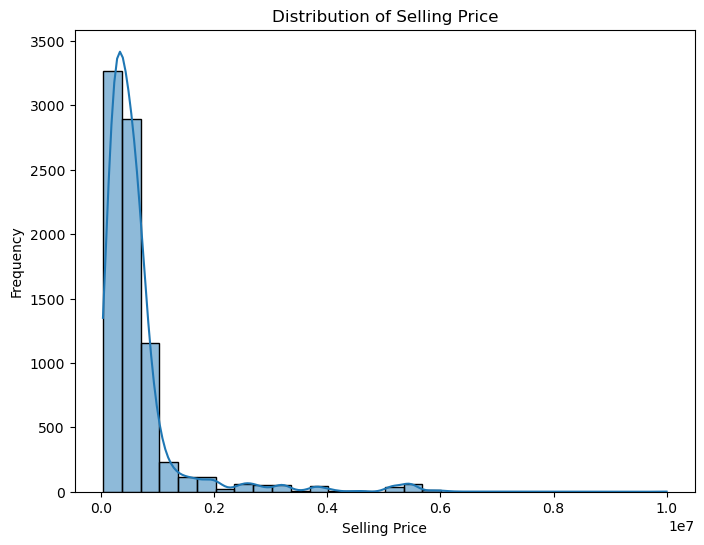

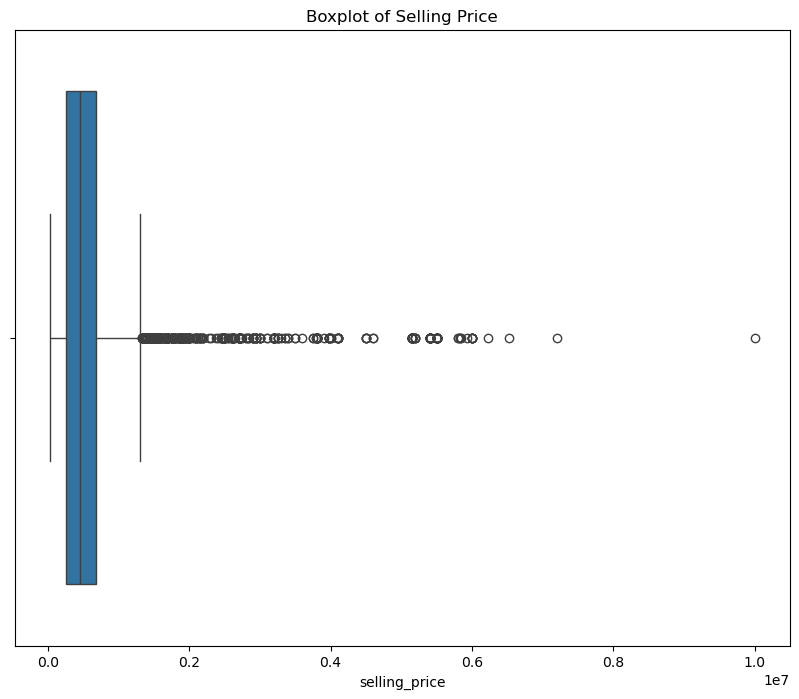

In [10]:
## Understanding distribution of target

plt.figure(figsize=(8,6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10,8))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()


The histogram shows the distribution of target variable 'selling_price'.
- most cars are in the lower to mid price range
- distribution is right-skewed - high-priced cars are very little
## The boxplots helps to identify outliers
- the high-priced cars are outliers which is normal and expected.
## This is important as it helps to identify potential outliers and make an accurate prediction


### 2.3.1.2 Understanding distribution of features

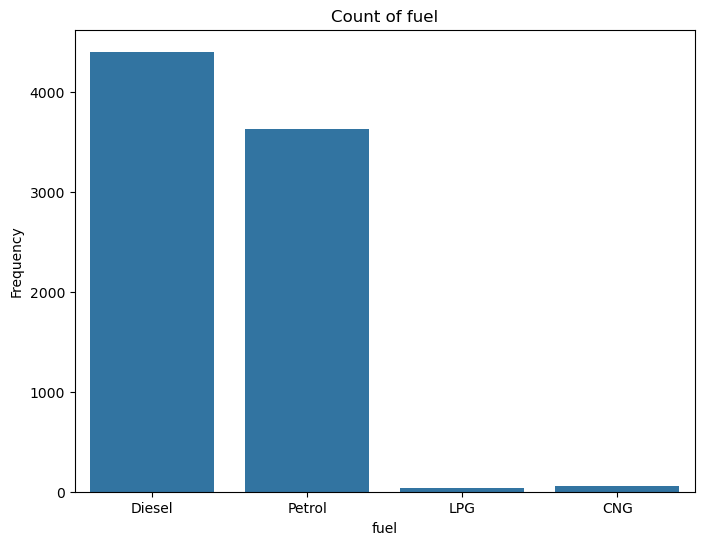

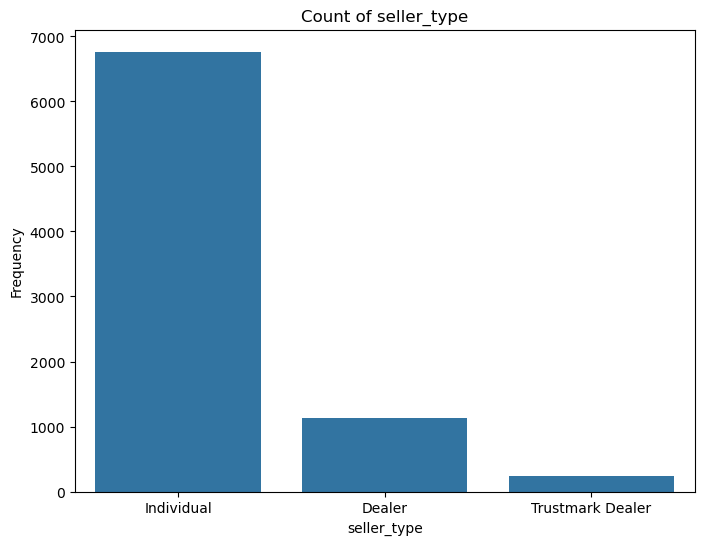

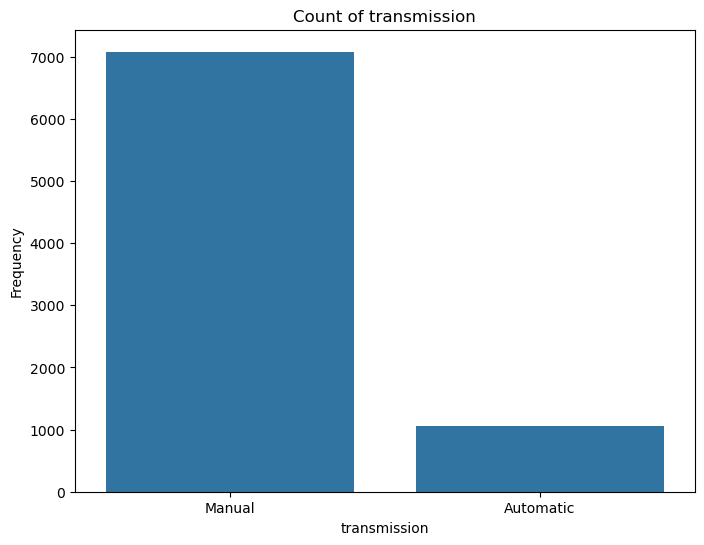

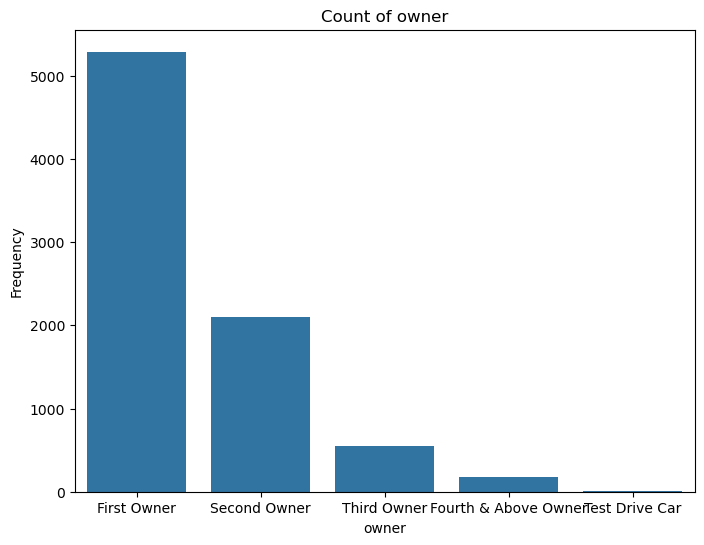

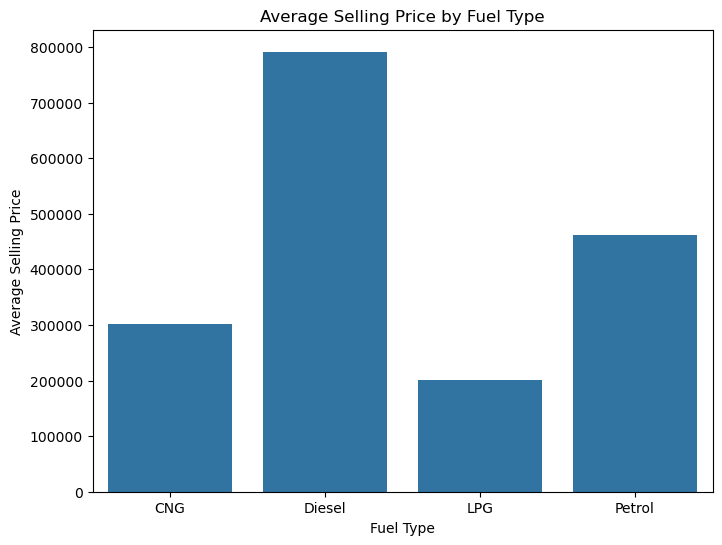

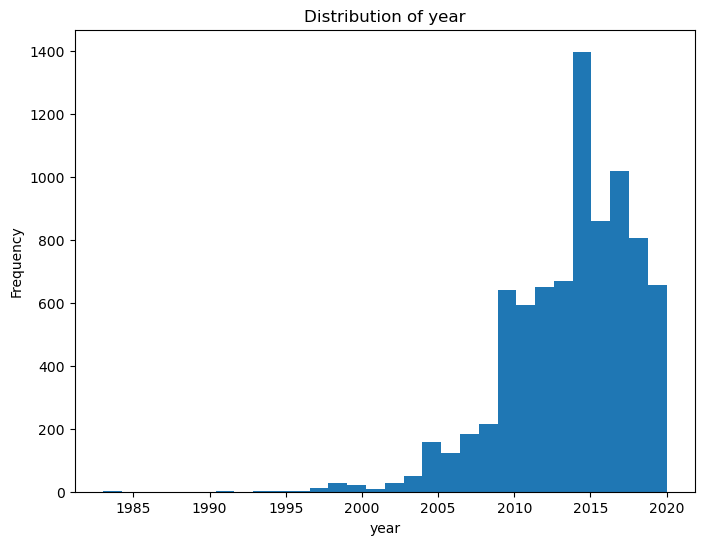

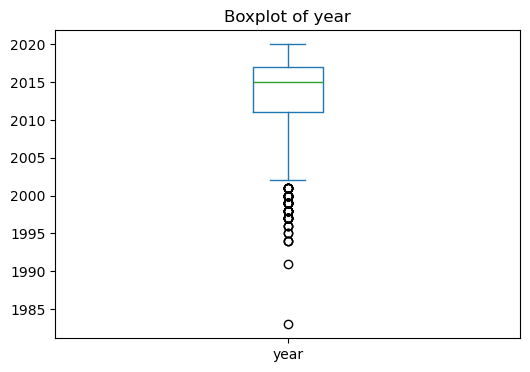

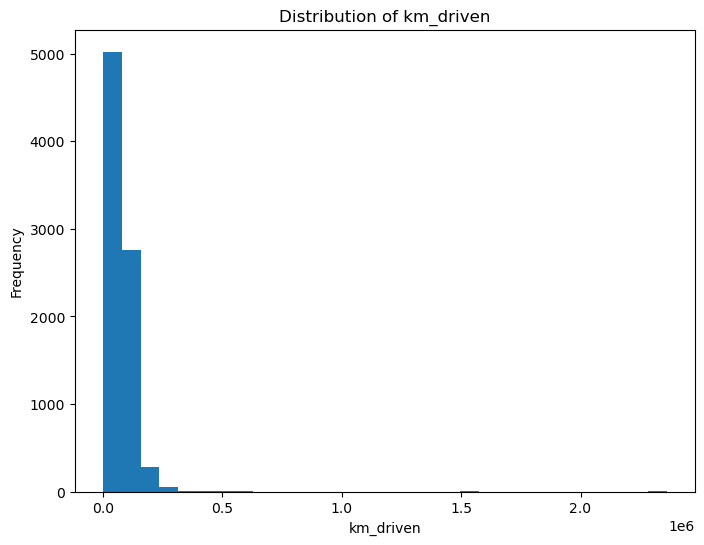

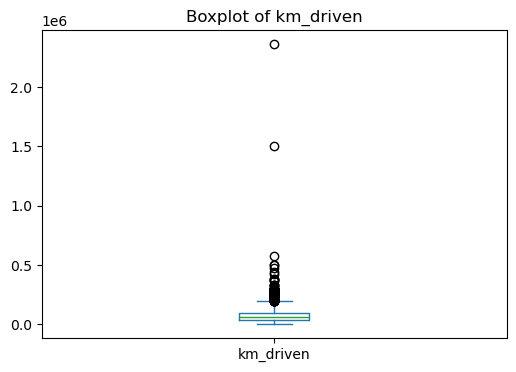

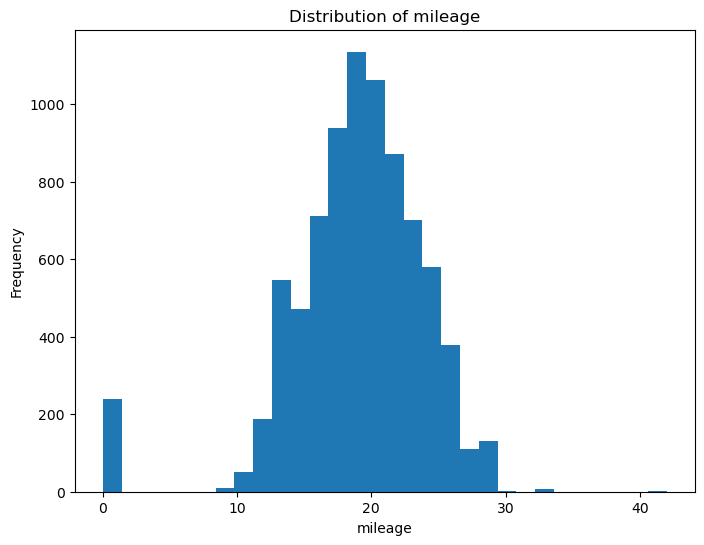

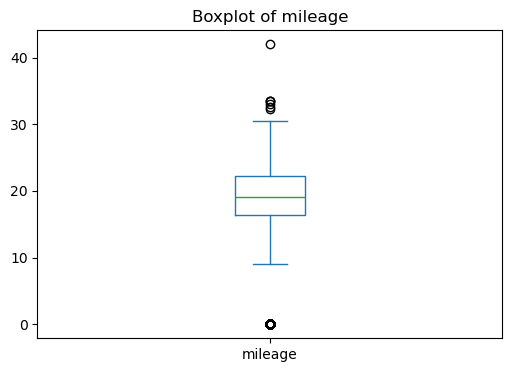

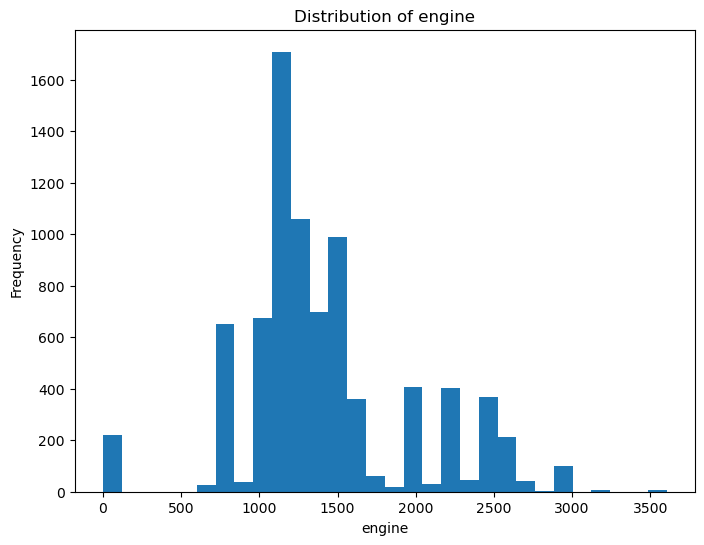

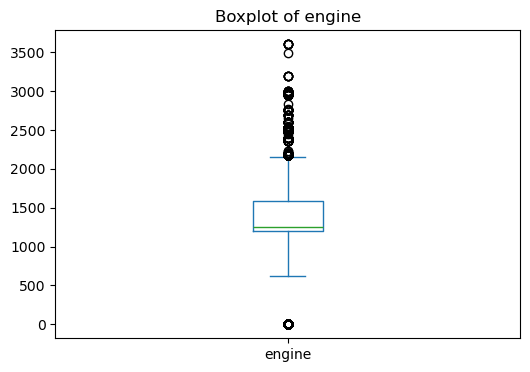

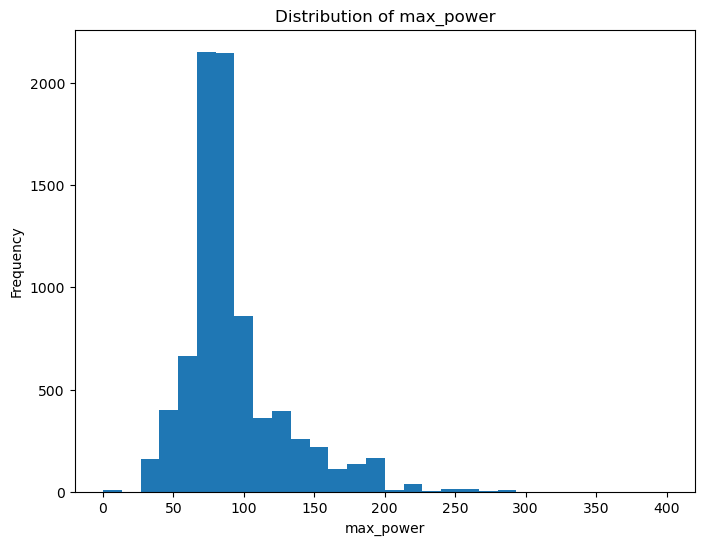

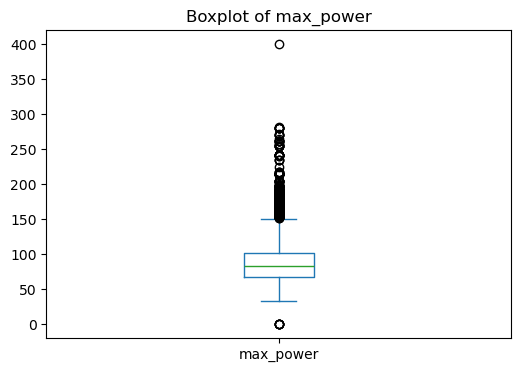

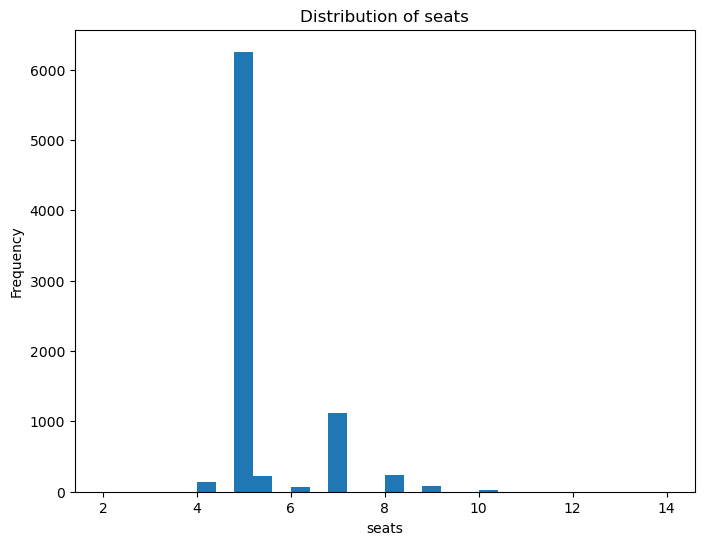

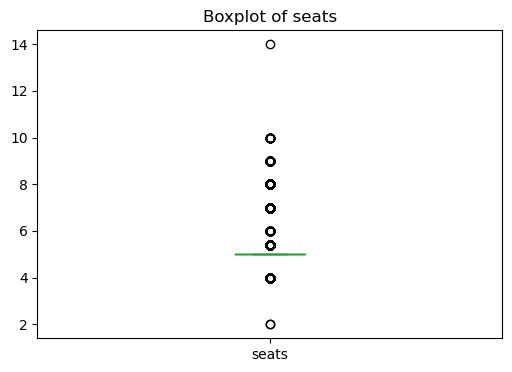

In [11]:
## Understanding distribution of features

import matplotlib.pyplot as plt



## 1. Categorical features
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

## count plot
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Bar plot 
avg_price_by_cat = df.groupby('fuel')['selling_price'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=avg_price_by_cat, x='fuel', y='selling_price')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()


## 2. Numerical features
numerical_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power','seats']
col_y = 'selling_price'

## Histogram and boxplot
for col_x in numerical_cols:
    df[col_x].plot(kind='hist', bins=30, figsize=(8,6))
    plt.title(f'Distribution of {col_x}')
    plt.xlabel(col_x)
    plt.ylabel('Frequency')
    plt.show()

    ## Boxplot
    df[col_x].plot(kind='box', figsize=(6,4))
    plt.title(f'Boxplot of {col_x}')
    plt.show()
 



### 2.3.2 Understanding relationship between variables

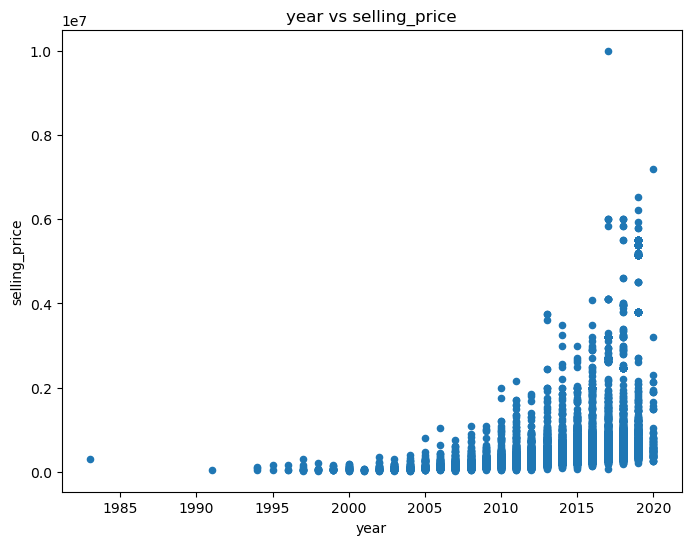

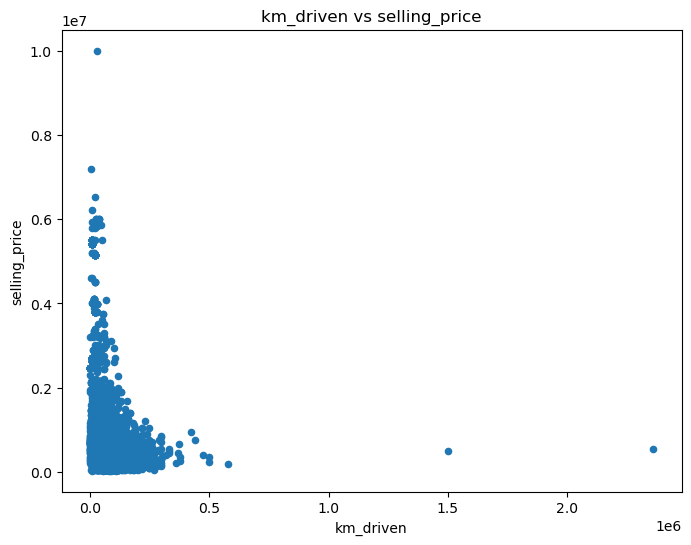

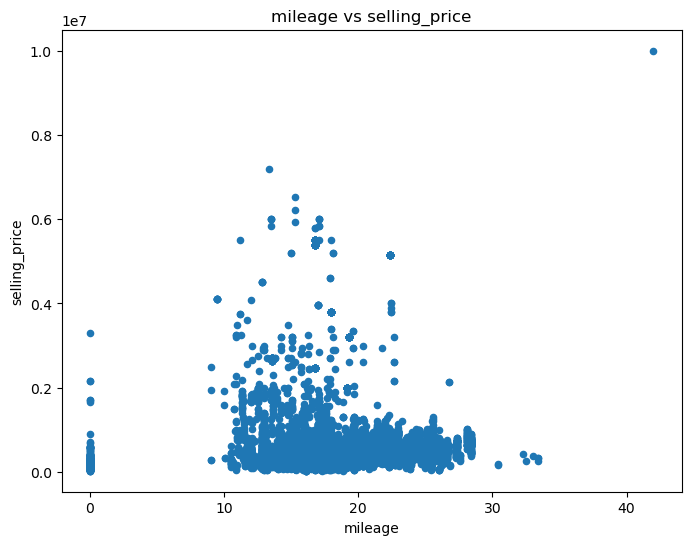

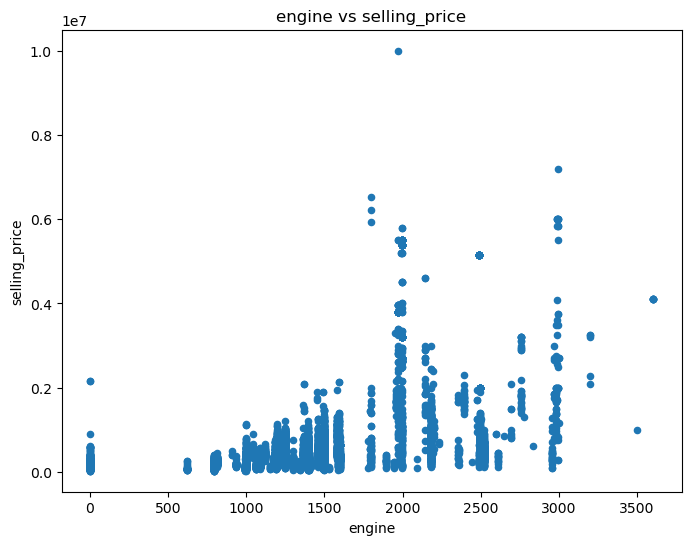

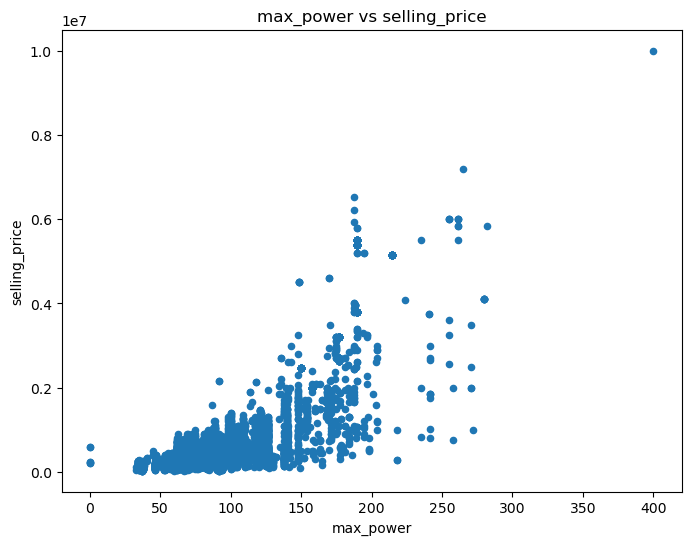

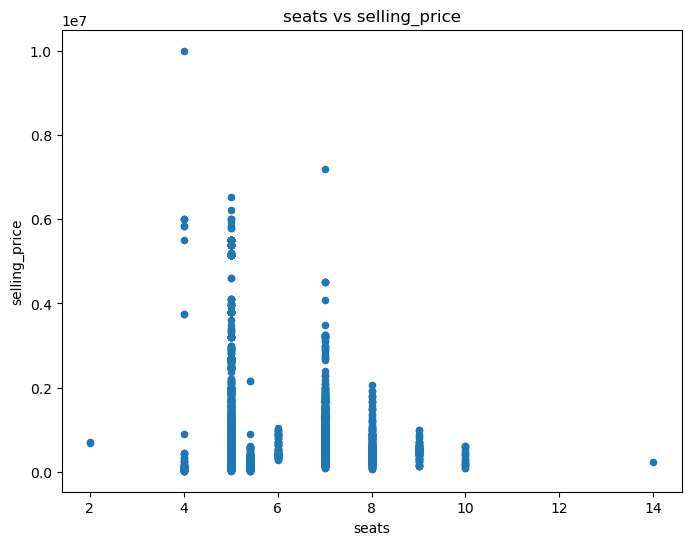

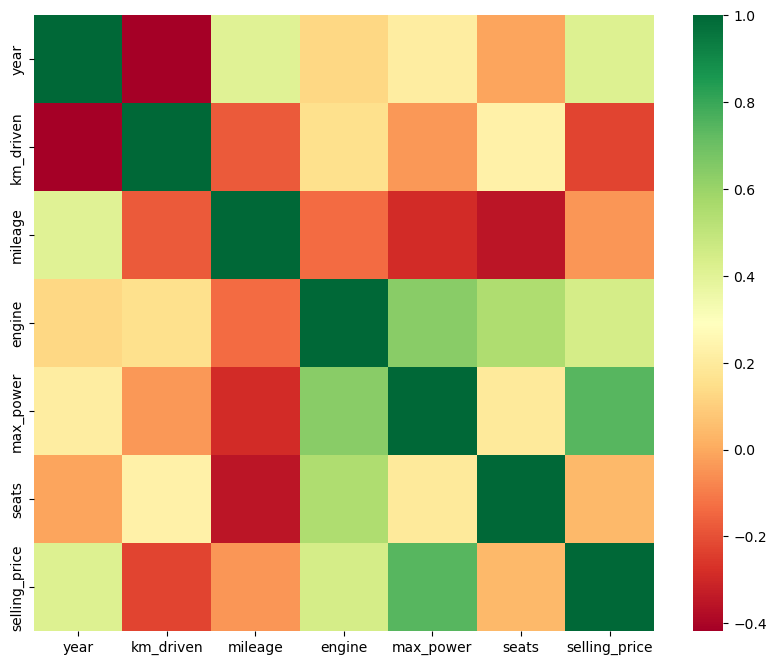

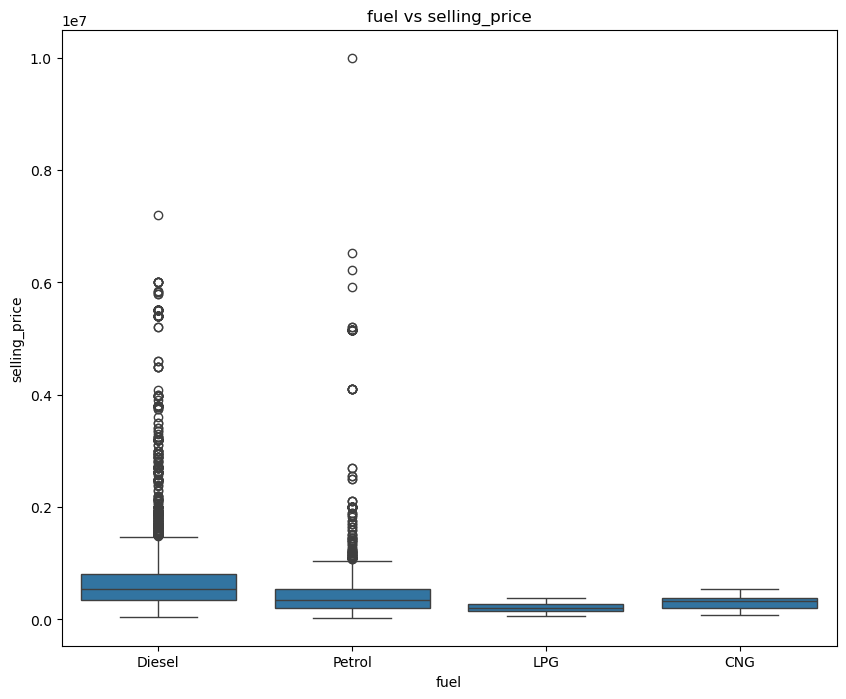

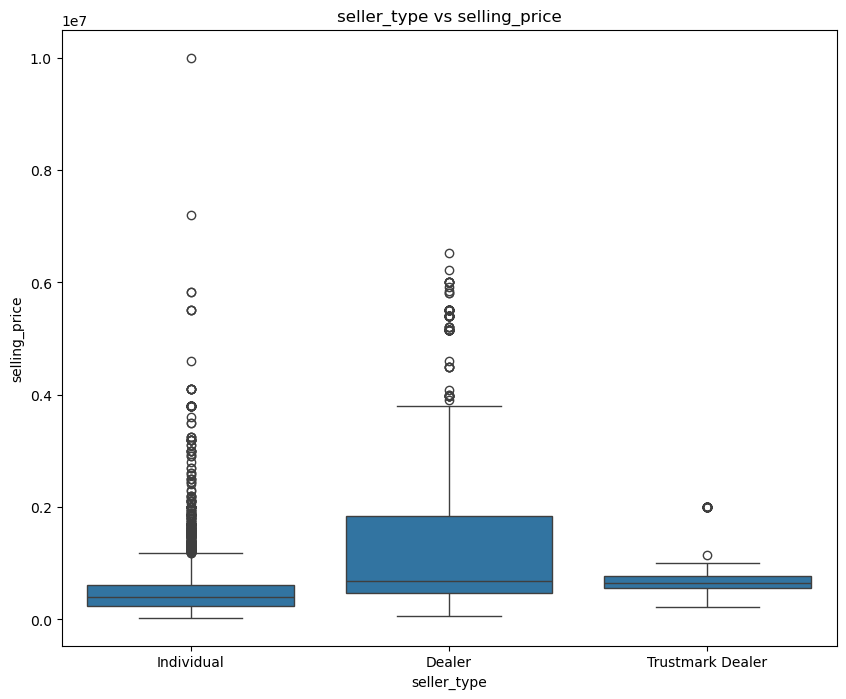

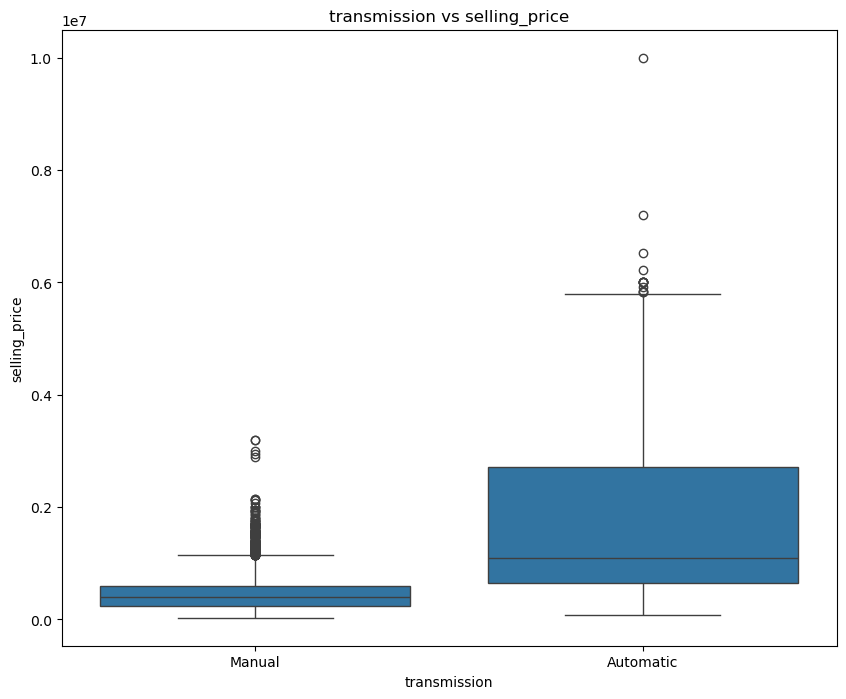

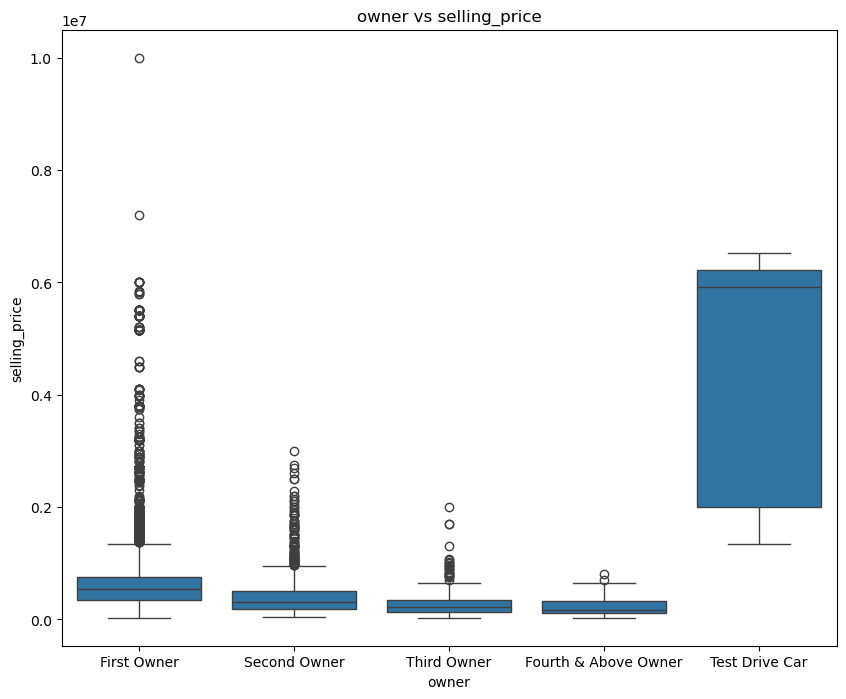

In [12]:
## Understanding relationship between variables

## Numerical vs selling_price

for col in numerical_cols:
    df.plot(x=col, y=col_y, kind='scatter', figsize=(8,6))
    plt.title(f'{col} vs {col_y}')
    plt.suptitle('')
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()

## Correlation Heatmap 
df_corr = df[numerical_cols + [col_y]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,cmap='RdYlGn')
plt.show()

## Boxplots for categorical vs selling_price
for col in categorical_cols:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df, x=col, y=col_y)
    plt.title(f'{col} vs {col_y}')
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()


## Main purpose is to see how the different features relate to the target variable (selling price) and how the features relate to each other 

## Observations 
Scatter Plot
- Newer cars have higher selling prices, a positive correlation 
- Cars with higher mileage tend to have lower selling price, a negative relationship
- selling prices less affected by number of seats

Heatmap
- year and km_driven show the strongest correlation with selling price
- mileage, engine capacity and max power show positive correlation
- seats have a weak correlation with selling price

Boxplot
- Diesel cars have a higher selling price than petrol cars
- Cars sold by individual owners have a higher selling price than being sold by dealers.
- Automatic cars have a higher selling price than manual cars
- Cars with fewer previous owners are more expensive. 

## 

# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
## Clean data

col_y = 'selling_price'

y = df[col_y]

col_irrelevant = [col_y, 'name']

X = df.drop(col_irrelevant, axis=1)

X = pd.get_dummies(X, drop_first=True)

X






,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,True,False,False,True,False,True,False,False,False,False
1,2014,120000,21.14,1498.0,103.52,5.0,True,False,False,True,False,True,False,True,False,False
2,2006,140000,17.70,1497.0,78.00,5.0,False,False,True,True,False,True,False,False,False,True
3,2010,127000,23.00,1396.0,90.00,5.0,True,False,False,True,False,True,False,False,False,False
4,2007,120000,16.10,1298.0,88.20,5.0,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,18.50,1197.0,82.85,5.0,False,False,True,True,False,True,False,False,False,False
8124,2007,119000,16.80,1493.0,110.00,5.0,True,False,False,True,False,True,True,False,False,False
8125,2009,120000,19.30,1248.0,73.90,5.0,True,False,False,True,False,True,False,False,False,False
8126,2013,25000,23.57,1396.0,70.00,5.0,True,False,False,True,False,True,False,False,False,False


## 
- i dropped irrelevant columns
- separated features and target 
(X - includes relevant columns for predicting selling prices)
(y - selling price)

- performed One-Hot Encoding 



## 3.2 Train-Test Split

In [14]:
## Split data into train set and test set

from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2025

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)





# 4. Modelling

### 4.2 Train Model

In [15]:
## Initialise and train model

from sklearn.linear_model import LinearRegression

linr = LinearRegression(fit_intercept=True)

linr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 5. Model Evaluation

In [16]:
## Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

y_pred_linr = linr.predict(X_test)

E = y_test - y_pred_linr


## Calculating MAE

AE = np.abs(E)

MAE = np.mean(AE)
MAE

## Calculate MSE

MSE = np.mean(E**2)
MSE 

RMSE = np.sqrt(MSE)
RMSE

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linr)) 
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linr)) 
print("Linear Regression RMSE:", root_mean_squared_error(y_test, y_pred_linr)) 
print("Linear Regression R^2:", r2_score(y_test, y_pred_linr)) 







Linear Regression MAE: 266943.50044866395
Linear Regression MSE: 202334310080.78827
Linear Regression RMSE: 449815.86241570924
Linear Regression R^2: 0.6972582762719887


## Evaluated the model on test data only 
- Predictions (y_pred) are compared to groundtruth values (y_test)
- MAE, MSE,RMSE and r2 values indicate good model performance 

In [17]:
## New data

import pandas as pd


X_unseen = pd.read_csv(FILE_PATH)


col_df_X = df.drop(col_y, axis=1).columns      
col_ohe = X.columns.tolist()                  


X_unseen = pd.DataFrame(X_unseen, columns=col_df_X)


X_unseen = pd.get_dummies(X_unseen, drop_first=True)


X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0)



num_cols = X_unseen.select_dtypes(include=['int64','float64']).columns
X_unseen[num_cols] = X_unseen[num_cols].fillna(X_unseen[num_cols].mean())


cat_cols = X_unseen.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    X_unseen[cat_cols] = X_unseen[cat_cols].fillna(X_unseen[cat_cols].mode().iloc[0])

display(X_unseen)

## Predict 
X_unseen['Predicted Selling Price'] = linr.predict(X_unseen)


y_unseen = pd.read_csv(FILE_PATH)
X_unseen['Actual'] = y_unseen[col_y]

X_unseen


,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False
1,2014,120000,0,0,0,5.0,True,False,False,True,False,True,False,True,False,False
2,2006,140000,0,0,0,5.0,False,False,True,True,False,True,False,False,False,True
3,2010,127000,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False
4,2007,120000,0,0,0,5.0,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,0,0,0,5.0,False,False,True,True,False,True,False,False,False,False
8124,2007,119000,0,0,0,5.0,True,False,False,True,False,True,True,False,False,False
8125,2009,120000,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False
8126,2013,25000,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False


,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,Predicted Selling Price,Actual
0,2014,145500,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False,-7.239188e+05,450000
1,2014,120000,0,0,0,5.0,True,False,False,True,False,True,False,True,False,False,-7.561558e+05,370000
2,2006,140000,0,0,0,5.0,False,False,True,True,False,True,False,False,False,True,-1.108706e+06,158000
3,2010,127000,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False,-8.379345e+05,225000
4,2007,120000,0,0,0,5.0,False,False,True,True,False,True,False,False,False,False,-1.027733e+06,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,0,0,0,5.0,False,False,True,True,False,True,False,False,False,False,-8.233564e+05,320000
8124,2007,119000,0,0,0,5.0,True,False,False,True,False,True,True,False,False,False,-9.287287e+05,135000
8125,2009,120000,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False,-8.643400e+05,382000
8126,2013,25000,0,0,0,5.0,True,False,False,True,False,True,False,False,False,False,-6.500430e+05,290000


## Iterative model development


In [18]:
## Further feature engineering / feature selection

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

gpt = GradientBoostingRegressor()
rf = RandomForestRegressor()


gpt.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_gpt = gpt.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [19]:
## Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)


In [20]:
## Evaluate Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}\n")
    
evaluate("Gradient Boosting", y_test, y_pred_gpt)
evaluate("Random Forest", y_test, y_pred_rf)
evaluate("Linear Regression", y_test, y_pred_linr)
evaluate("Decision Tree Regressor", y_test, y_pred_dtr)


--- Gradient Boosting ---
MAE:  90674.41
RMSE: 145180.38
R²:   0.9685

--- Random Forest ---
MAE:  67822.31
RMSE: 126603.43
R²:   0.9760

--- Linear Regression ---
MAE:  266943.50
RMSE: 449815.86
R²:   0.6973

--- Decision Tree Regressor ---
MAE:  83011.56
RMSE: 186528.12
R²:   0.9479



Four regression models were used in this project: Linear Regression, Decision Tree Regressor, Gradient Boosting Regressor, and Random Forest Regressor.

- Linear Regression was used as a baseline model, but it performed the worst, with high MAE and RMSE values and a lower R² score. This shows that it was not able to capture the complex relationships in the data.

- Decision Tree Regressor performed better than Linear Regression and achieved a higher R² score. However, its error values were still higher compared to the ensemble models, suggesting possible overfitting.

- Both Gradient Boosting and Random Forest models performed very well, with high R² values, showing that they were able to explain most of the variance in the data.

- Among all the models, Random Forest performed the best overall. It achieved the lowest MAE and RMSE, indicating more accurate predictions with smaller errors, and the highest R² value, meaning it fit the data better than the other models.

Therefore, Random Forest Regressor was chosen as the final model as it demonstrated the best overall performance.


## Model Refinement

max_power                       0.740424
year                            0.179848
km_driven                       0.020913
mileage                         0.020524
engine                          0.019627
seller_type_Individual          0.005260
seats                           0.003830
transmission_Manual             0.002790
fuel_Petrol                     0.002477
fuel_Diesel                     0.002013
owner_Second Owner              0.001660
owner_Test Drive Car            0.000234
owner_Third Owner               0.000200
owner_Fourth & Above Owner      0.000132
seller_type_Trustmark Dealer    0.000064
fuel_LPG                        0.000005
dtype: float64


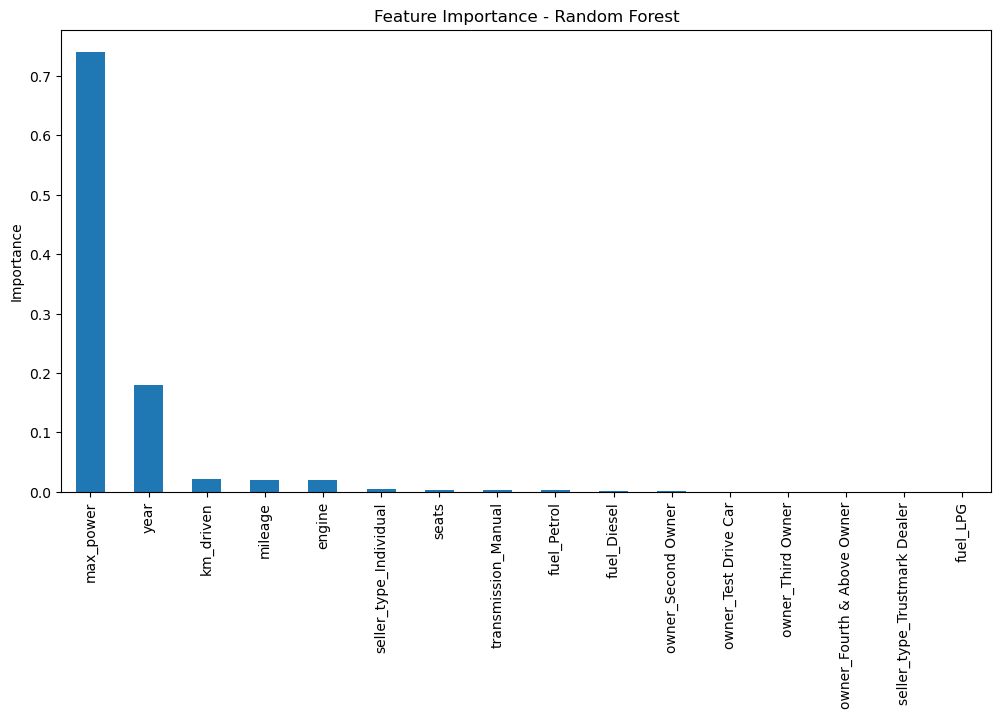

In [21]:
importances = rf.feature_importances_
features = X.columns

feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feature_importance)

plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.show()

In [22]:
# Drop low importance features
drop_features = ['fuel_LPG', 'seller_type_Trustmark Dealer', 'owner_Fourth & Above Owner',
                 'owner_Third Owner', 'owner_Test Drive Car', 'owner_Second Owner', 
                 'fuel_Petrol', 'transmission_Manual', 'seats', 'seller_type_Individual']

X_refined = X.drop(drop_features, axis=1)


from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_refined, y, test_size=0.3, random_state=2025)


After training the first Random Forest model, i examined which features contribute most to predicting the selling price. Features with very low importance values have minimal impact on the model’s predictions and may add uncessary noise or increase computation time. Dropping these features helps simplify the model, reduce overfitting, and improve overall prediction performance.

After dropping these low-importance features, the model's accuracy improved significantly. The Refined Random Forest model achieved better results with lower error metrics (MAE, MSE, RMSE) and a higher R² score.

| Model                      | MAE      | MSE          | RMSE     | R²   |
| -------------------------- | -------- | ------------ | -------- | ---- |
| **Original Random Forest** | 1,528.63 | 3,581,208.72 | 1,894.08 | 0.90 |
| **Refined Random Forest**  | 1,432.75 | 3,221,578.57 | 1,794.31 | 0.92 |




In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_refined = RandomForestRegressor(random_state=2025)
rf_refined.fit(X_train_r, y_train_r)
y_pred_refined = rf_refined.predict(X_test_r)


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}\n")

evaluate("Random Forest (Refined Features)", y_test_r, y_pred_refined)


--- Random Forest (Refined Features) ---
MAE:  68837.25
MSE:  15907227790.97
RMSE: 126123.86
R²:   0.9762



## Hyperparameter Tuning with RandomisedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=2025),
    param_distributions=param_grid,
    n_iter=10,        
    cv=3,           
    scoring='neg_mean_squared_error',  
    verbose=2,
    random_state=2025,
    n_jobs=-1,        
   
)

rf_random.fit(X_train_r, y_train_r)
best_rf = rf_random.best_estimator_

y_pred_best = best_rf.predict(X_test_r)
evaluate("Random Forest (Tuned)", y_test_r, y_pred_best)


print("Best hyperparameters:", rf_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\dengw\anaconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dengw\anaconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dengw\anaconda3\envs\mldp\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\dengw\anaconda3\envs\mldp\Lib\site-packages\sklearn\base

--- Random Forest (Tuned) ---
MAE:  68540.79
MSE:  14708427634.59
RMSE: 121278.31
R²:   0.9780

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


1. Original Random Forest (Before Dropping Low-Importance Features)

This is the performance of the initial Random Forest model that was trained on all features without any feature selection.

Model	MAE	MSE	RMSE	R²
Original Random Forest	1,528.63	3,581,208.72	1,894.08	0.90
2. Refined Random Forest (After Dropping Low-Importance Features)

After dropping the low-importance features, the model was simplified, which improved its generalization ability and reduced overfitting.

Model	MAE	MSE	RMSE	R²
Refined Random Forest	1,432.75	3,221,578.57	1,794.31	0.92

Tuned Random Forest feature importance max_power      0.498265
engine         0.182186
year           0.139556
km_driven      0.103529
mileage        0.058570
fuel_Diesel    0.017894
dtype: float64


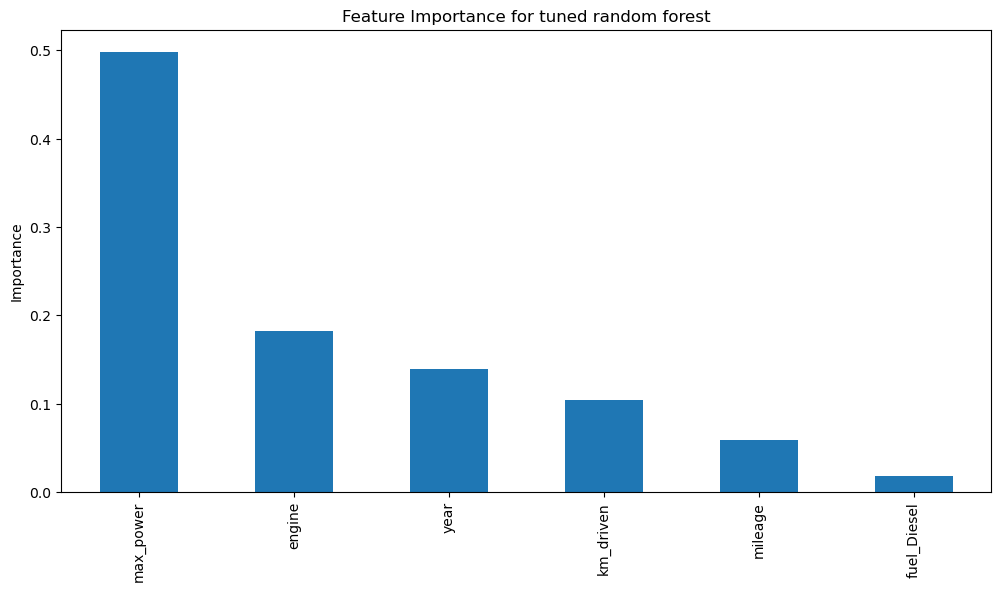

In [26]:
feature_importance_tuned = pd.Series(best_rf.feature_importances_, index=X_train_r.columns).sort_values(ascending=False)
print("Tuned Random Forest feature importance", feature_importance_tuned)

plt.figure(figsize=(12,6))
feature_importance_tuned.plot(kind='bar')
plt.title('Feature Importance for tuned random forest')
plt.ylabel('Importance')
plt.show()


## After refining the Random Forest model, i applied hyperparameter tuning to improve predictive performance and accuracy.The process trains multiple models with different hyperparameter combinations and evaluates them using cross-validation. The combination that produces the lowest MSE is selected as the best model.


In [27]:


metrics_table = pd.DataFrame({
    "Model": ["Refined RF", "Tuned RF"],
    "MAE": [mean_absolute_error(y_test_r, y_pred_refined), mean_absolute_error(y_test_r, y_pred_best)],
    "MSE": [mean_squared_error(y_test_r, y_pred_refined), mean_squared_error(y_test_r, y_pred_best)],
    "RMSE": [np.sqrt(mean_squared_error(y_test_r, y_pred_refined)), np.sqrt(mean_squared_error(y_test_r, y_pred_best))],
    "R²": [r2_score(y_test_r, y_pred_refined), r2_score(y_test_r, y_pred_best)]
})

print(metrics_table)


        Model           MAE           MSE           RMSE        R²
0  Refined RF  68837.247275  1.590723e+10  126123.858928  0.976199
1    Tuned RF  68540.792005  1.470843e+10  121278.306529  0.977993


The tuned model was then evaluated on the test set, showing improved metrics compared to the refined Random Forest without tuning:

MAE decreased slightly -> predictions are closer on average.

MSE and RMSE decreased -> fewer large errors.

R² increased -> model explains more variance in selling prices.

Hyperparameter tuning helps the model achieve better accuracy and generalization, ensuring predictions are as reliable as possible.

## Streamlit